In [15]:
from cil.io import NEXUSDataReader
import matplotlib.pyplot as plt
import numpy
import scipy.io as sio

from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# Load the following reconstructions

1. SIRT without warm initialization
1. SIRT with warm initialization (energy channel correlation)
1. SpatioSpectral TV reconstruction (SPDHG)
1. 3D+Spectral TV reconstruction (SPDHG)
1. SpatioSpectral TV reconstruction (PDHG)

In [10]:
reader = NEXUSDataReader(file_name = "HyperspectralData/sirt_recon_nowarm.nxs")
sirt_nowarm = reader.load_data()

reader = NEXUSDataReader(file_name = "HyperspectralData/sirt_recon_warm.nxs")
sirt_warm = reader.load_data()

reader = NEXUSDataReader(file_name = "HyperspectralData/spdhg_spatiospectral_tv_reconstruction_iter_1000.nxs")
spdhg_spatiospectral_tv = reader.load_data()

reader = NEXUSDataReader(file_name = "HyperspectralData/pdhg_spatiospectral_tv_reconstruction_iter_1000.nxs")
pdhg_spatiospectral_tv = reader.load_data()

reader = NEXUSDataReader(file_name = "HyperspectralData/spdhg_3d_spectral_tv_reconstruction.nxs")
spdhg_3d_spectral_tv = reader.load_data()

In [11]:
# Read Energy channels    
tmp_energy_channels = sio.loadmat("MatlabData/commonX.mat")        
echannels = tmp_energy_channels['commonX']
crop_channels = echannels[0][318:398]

If all the energy channels are used:

1. Replace `chan_ind` with `chan_ind = [10, 40, 70]`.
1. Comment the `crop_channels` parameter.
1. Change `vertical_slice` to `20`.

In [12]:
crop_channels = crop_channels[37:42]
chan_ind = [0, 1, 2]
vertical_slice = 3

<ipython-input-13-9e8c0858b98d>:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.annotate('Quartz', xy=(300,200), xytext=(200, 250), fontSize=23,
<ipython-input-13-9e8c0858b98d>:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.annotate(r'$\mathrm{ROI}_{1}$ (Gold)', xy=(166,180), xytext=(166, 120), fontSize=23,
<ipython-input-13-9e8c0858b98d>:39: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.annotate(r'$\mathrm{ROI}_{2}$ (Lead)', xy=(178,290), xytext=(151, 350), fontSize=23,


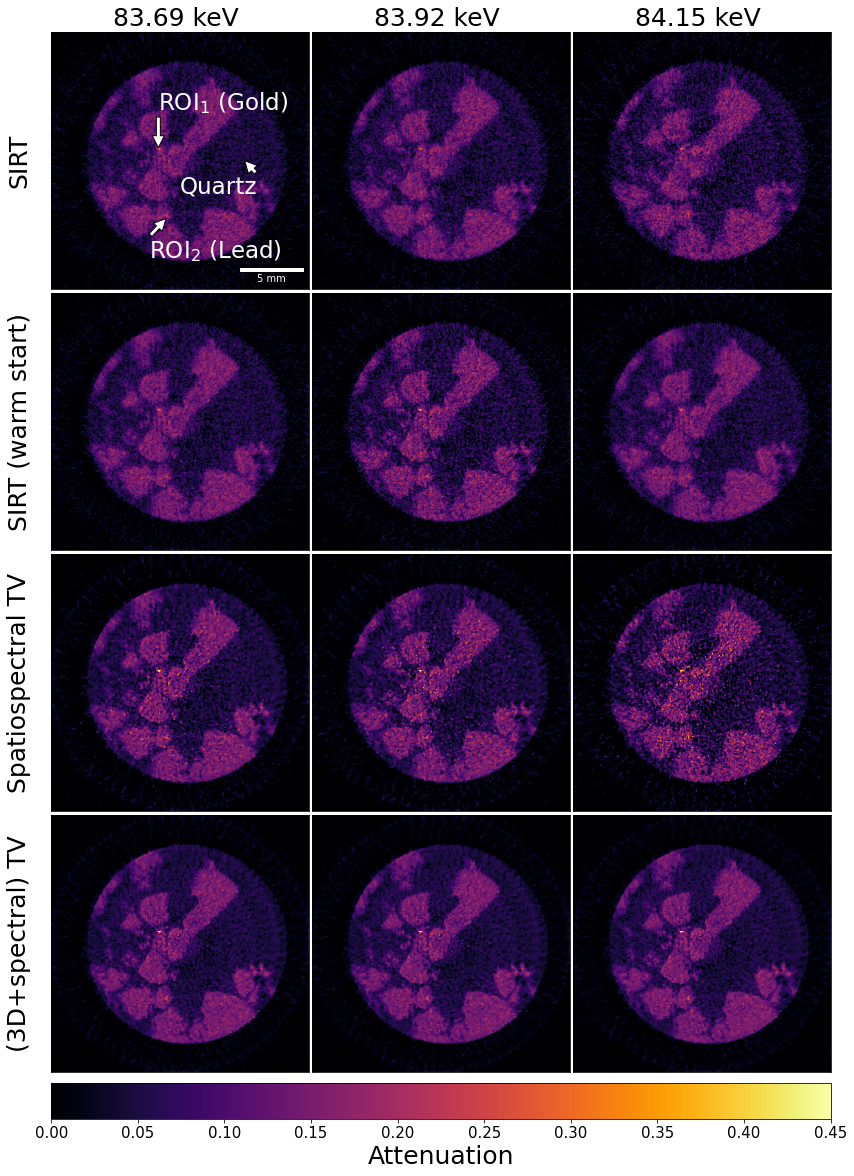

In [13]:
recons = [sirt_nowarm.as_array()[chan_ind[0]], sirt_nowarm.as_array()[chan_ind[1]], sirt_nowarm.as_array()[chan_ind[2]],  
          sirt_warm.as_array()[chan_ind[0]], sirt_warm.as_array()[chan_ind[1]],  sirt_warm.as_array()[chan_ind[0]],
          spdhg_spatiospectral_tv.as_array()[chan_ind[0]], spdhg_spatiospectral_tv.as_array()[chan_ind[1]], spdhg_spatiospectral_tv.as_array()[chan_ind[2]],  
          spdhg_3d_spectral_tv.as_array()[chan_ind[0]], spdhg_3d_spectral_tv.as_array()[chan_ind[1]],  spdhg_3d_spectral_tv.as_array()[chan_ind[0]]]

                   
labels_y = ["SIRT", "SIRT (warm start)","Spatiospectral TV", "(3D+spectral) TV"]
labels_x = ["{:.2f} keV ".format(crop_channels[chan_ind[0]]),
           "{:.2f} keV ".format(crop_channels[chan_ind[1]]),
           "{:.2f} keV ".format(crop_channels[chan_ind[2]])]


# set fontszie xticks/yticks
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

fig = plt.figure(figsize=(20, 20))

grid = AxesGrid(fig, 111,
                nrows_ncols=(4, 3),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='bottom',
                cbar_size = 0.5,
                cbar_pad=0.1
                )

k = 0

for ax in grid:
    
    
    im = ax.imshow(recons[k][vertical_slice],vmin=0,vmax=0.45, cmap="inferno")
    if k==0:
        ax.annotate('Quartz', xy=(300,200), xytext=(200, 250), fontSize=23,
            arrowprops=dict(facecolor='white', shrink=0.007), color="white", xycoords="data", textcoords='data') 
        ax.annotate(r'$\mathrm{ROI}_{1}$ (Gold)', xy=(166,180), xytext=(166, 120), fontSize=23,
            arrowprops=dict(facecolor='white'), color="white", xycoords="data", textcoords='data')
        ax.annotate(r'$\mathrm{ROI}_{2}$ (Lead)', xy=(178,290), xytext=(151, 350), fontSize=23,
            arrowprops=dict(facecolor='white'), color="white", xycoords="data", textcoords='data')  
       
    if k==0:
        
        ax.set_title(labels_x[0],fontsize=25)
        ax.set_ylabel(labels_y[0],fontsize=25, labelpad=20)
        scalebar = AnchoredSizeBar(ax.transData,
                           97, '5 mm', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=5)

        ax.add_artist(scalebar)           

    if k==1:
        ax.set_title(labels_x[1],fontsize=25)

    if k==2:
        ax.set_title(labels_x[2],fontsize=25)
            
    if k==3:
        ax.set_ylabel(labels_y[1],fontsize=25, labelpad=20)
        
    if k==6:
        ax.set_ylabel(labels_y[2],fontsize=25, labelpad=20)        
        
    if k==9:
        ax.set_ylabel(labels_y[3],fontsize=25, labelpad=20)        

    ax.set_xticks([])
    ax.set_yticks([])
    k+=1
    
cbar = ax.cax.colorbar(im)
cbar.ax.set_xlabel('Attenuation', fontsize=25)
plt.show()


# Compare PDHG vs SPDHG

In [17]:
pdhg_epochs = {}
for i in range(0,51,5):
    reader_pdhg = NEXUSDataReader(file_name = "HyperspectralData/pdhg_spatiospectral_tv_reconstruction_iter_{}.nxs".format(i))
    pdhg_epochs[str(i)] = reader_pdhg.load_data()
    
spdhg_epochs = {}
for i in range(0,1001,100):
    reader_spdhg = NEXUSDataReader(file_name = "HyperspectralData/spdhg_spatiospectral_tv_reconstruction_iter_{}.nxs".format(i))
    spdhg_epochs[str(i)] = reader_spdhg.load_data()  


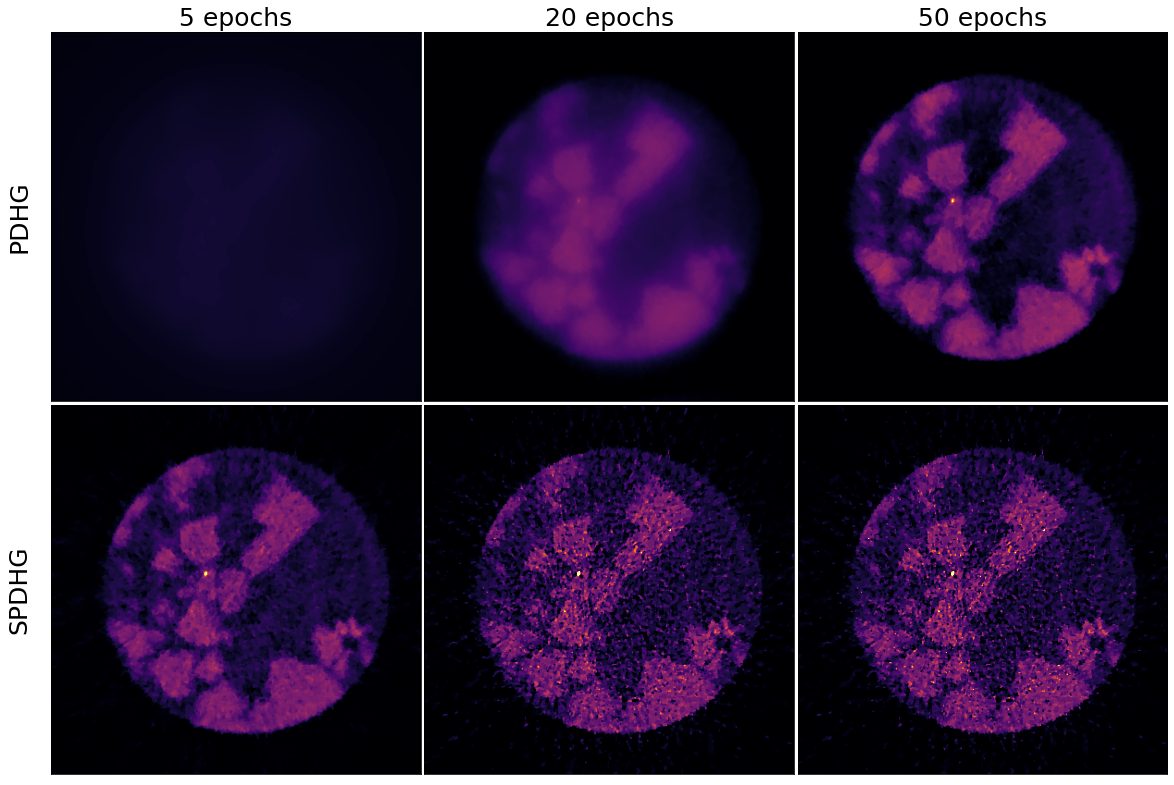

In [18]:
chan_ind = [3]
slice_ind = 4

recons = [pdhg_epochs['5'].as_array()[chan_ind[0]], pdhg_epochs['20'].as_array()[chan_ind[0]], pdhg_epochs['50'].as_array()[chan_ind[0]],
          spdhg_epochs['100'].as_array()[chan_ind[0]], spdhg_epochs['400'].as_array()[chan_ind[0]], spdhg_epochs['1000'].as_array()[chan_ind[0]]]
        
labels_x = ["5 epochs", "20 epochs", "50 epochs"]
labels_y = ["PDHG", "SPDHG"]

# set fontszie xticks/yticks
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

fig = plt.figure(figsize=(20, 20))

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 3),
                axes_pad=0.05
                )

k = 0

for ax in grid:
    
    ax.imshow(recons[k][slice_ind],vmin=0,vmax=0.45, cmap="inferno")
       
    if k==0:
        ax.set_title(labels_x[0],fontsize=25)
        ax.set_ylabel(labels_y[0],fontsize=25, labelpad=20)
    if k==1:
        ax.set_title(labels_x[1],fontsize=25)
    if k==2:
        ax.set_title(labels_x[2],fontsize=25) 
    if k==3:
        ax.set_ylabel(labels_y[1],fontsize=25, labelpad=20) 
       
    ax.set_xticks([])
    ax.set_yticks([])
    
    k+=1


plt.show()

